In [1]:
import numpy as np
import cv2 as cv
import os.path
import glob
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:
path = "/content/*.jpg"
save_path = "/content/testing"

if not os.path.exists(save_path):
  os.makedirs(save_path)

AUTOMATION

In [ ]:
for file in glob.glob(path):
  img = cv.imread(file)
  #CROPPING
  cropped_image = img[2000:2500, 1000:1500]
  #RESIZING
  scale_percent = 50
  width = int(cropped_image.shape[1] * scale_percent / 100)
  height = int(cropped_image.shape[0] * scale_percent / 100)
  dsize = (width, height)
  resized = cv.resize(cropped_image, dsize, interpolation= cv.INTER_LINEAR)
  #AUGMENTATION
  rotcw90 = cv.rotate(resized, cv.ROTATE_90_CLOCKWISE)
  rotccw90 = cv.rotate(resized, cv.ROTATE_90_COUNTERCLOCKWISE)
  rot180 = cv.rotate(resized, cv.ROTATE_180)
  flip_vr = cv.flip(resized, 0)
  flip_hr = cv.flip(resized, 1)

  #SAVING
  basename = os.path.basename(file)  # e.g. MyPhoto.jpg
  name = os.path.splitext(basename)[0]  # e.g. MyPhoto
  cv.imwrite('/save_path/' + name + '_ori.jpg', resized) #RESIZE
  cv.imwrite('/save_path/' + name + '_cw90.jpg', rotcw90) #ROT CW90
  cv.imwrite('/save_path/' + name + '_ccw90.jpg', rotccw90) #ROT CCW90
  cv.imwrite('/save_path/' + name + '_180.jpg', rot180) #ROT 180
  cv.imwrite('/save_path/' + name + '_vr.jpg', flip_vr) #FLIP VER
  cv.imwrite('/save_path/' + name + '_hr.jpg', flip_hr) #FLIP HOR


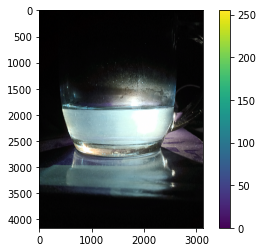

(<matplotlib.image.AxesImage at 0x7fc80139c7d0>,
 None)

In [12]:
img = cv.imread('/content/IMG20220210025006.jpg')
#cv2_imshow(img)
plt.imshow(img),plt.colorbar(),plt.show()

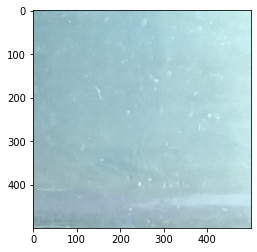

(500, 500, 3)


In [16]:
cropped_image = img[2000:2500, 1000:1500]
#cv2_imshow(cropped_image)
plt.imshow(cropped_image),plt.show()
print(cropped_image.shape)

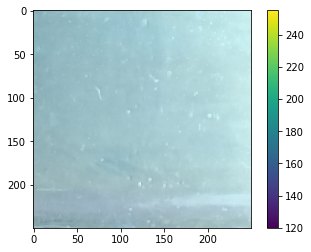

(250, 250, 3)


True

In [17]:
scale_percent = 50
width = int(cropped_image.shape[1] * scale_percent / 100)
height = int(cropped_image.shape[0] * scale_percent / 100)

dsize = (width, height)
resized = cv.resize(cropped_image, dsize, interpolation= cv.INTER_LINEAR)
#cv2_imshow(resized)
plt.imshow(resized),plt.colorbar(),plt.show()
print(resized.shape)
cv.imwrite('/content/ROI_resized.jpg', resized)

In [ ]:
image = cv.imread(resized)
rotcw90 = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)
rotccw90 = cv.rotate(image, cv.ROTATE_90_COUNTERCLOCKWISE)
rot180 = cv.rotate(image, cv.ROTATE_180)
flip_vr = cv.flip(image, 0)
flip_hr = cv.flip(image, 1)
#cv.imwrite('/content/ROI_resized.jpg', resized)

In [ ]:
path = "/path/*.jpg"

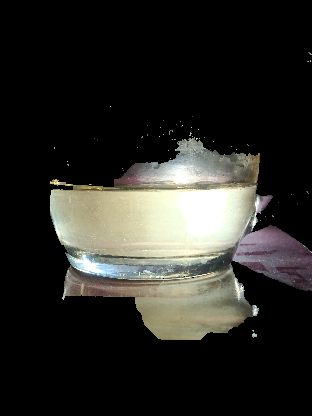

In [7]:
image = resized
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
newimg = image*mask2[:,:,np.newaxis]
cv2_imshow(newimg)
#plt.imshow(newimg),plt.show()